## 3D scatter plots with Plotly & Python

(copied FROM [StackOverFlow answer by krassowski](https://stackoverflow.com/a/71926421/8508004)   Tuesday, April 19, 2022)

**All of these cells will display plots in current JupyterLab (version 3.1.1 tested) even without using `%matplotlib inline`.** This was not the case with JupyterLab 2.1.3, where even using `%matplotlib inline` didn't help enable displaying these plots.


### Interactive 3D surface plot with Plotnine

>"For interactivity you can use any matplotlib backend of your liking, I went with ipylab (pip install ipylab and then %matplotlib widget in a jupyter notebook cell)."- SOURCE [krassowski](https://stackoverflow.com/a/71926421/8508004)

I found also needed ipympl.

For `aes` I adapted info from [Data Carpentry's: Making Plots With plotnine](https://datacarpentry.org/python-ecology-lesson/07-visualization-ggplot-python/index.html).

There are [caveats](https://stackoverflow.com/a/71926421/8508004) as spelled out by [michal krassowski (a.k.a. krassowski)](https://stackoverflow.com/users/6646912/krassowski).


*So far I see plot when I use `%matplotlib inline` but `%matplotlib` is supposed to work to show interactive??!?!*

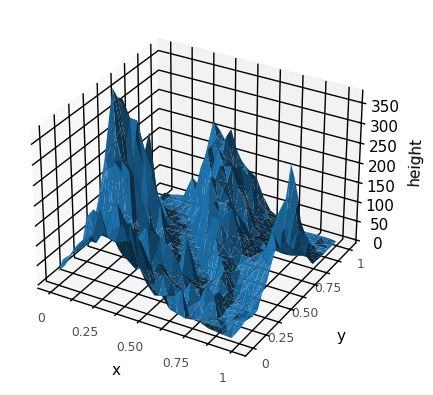

<ggplot: (8787579953465)>

In [11]:
%matplotlib inline

z_data = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/api_docs/mt_bruno_elevation.csv', index_col=0)
z = z_data.values
nrows, ncols = z.shape
x, y = np.linspace(0, 1, nrows), np.linspace(0, 1, ncols)
x, y = np.meshgrid(x, y)
mt_bruno_long = pd.DataFrame({'x': x.flatten(), 'y': y.flatten(), 'height': z.flatten()})

from plotnine import ggplot, geom_polygon
from plotnine.utils import to_rgba, SIZE_FACTOR


class ggplot_3d(ggplot):
    def _create_figure(self):
        figure = plt.figure()
        axs = [plt.axes(projection='3d')]
        
        figure._themeable = {}
        self.figure = figure
        self.axs = axs
        return figure, axs
    
    def _draw_labels(self):
        ax = self.axs[0]
        ax.set_xlabel(self.layout.xlabel(self.labels))
        ax.set_ylabel(self.layout.ylabel(self.labels))
        ax.set_zlabel(self.labels['z'])


class geom_polygon_3d(geom_polygon):
    REQUIRED_AES = {'x', 'y', 'z'}

    @staticmethod
    def draw_group(data, panel_params, coord, ax, **params):
        data = coord.transform(data, panel_params, munch=True)
        data['size'] *= SIZE_FACTOR

        grouper = data.groupby('group', sort=False)
        for i, (group, df) in enumerate(grouper):
            fill = to_rgba(df['fill'], df['alpha'])
            polyc = ax.plot_trisurf(
                df['x'].values,
                df['y'].values,
                df['z'].values,
                facecolors=fill if any(fill) else 'none',
                edgecolors=df['color'] if any(df['color']) else 'none',
                linestyles=df['linetype'],
                linewidths=df['size'],
                zorder=params['zorder'],
                rasterized=params['raster'],
            )
(
    ggplot_3d(mt_bruno_long)
    + aes(x='x', y='y', z='height')
    + geom_polygon_3d(size=0.01)
    + theme_minimal()
)

##### Self-contained example based on Matplotlib's documentation

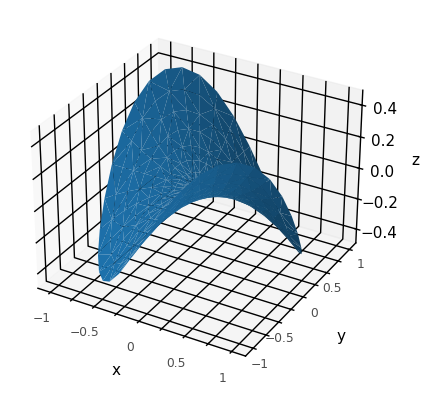

<ggplot: (8787578845017)>

In [9]:
%matplotlib inline
from plotnine import ggplot, geom_polygon, aes, theme_minimal
from plotnine.utils import to_rgba, SIZE_FACTOR
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

class ggplot_3d(ggplot):
    def _create_figure(self):
        figure = plt.figure()
        axs = [plt.axes(projection='3d')]
        
        figure._themeable = {}
        self.figure = figure
        self.axs = axs
        return figure, axs
    
    def _draw_labels(self):
        ax = self.axs[0]
        ax.set_xlabel(self.layout.xlabel(self.labels))
        ax.set_ylabel(self.layout.ylabel(self.labels))
        ax.set_zlabel(self.labels['z'])
        
class geom_polygon_3d(geom_polygon):
    REQUIRED_AES = {'x', 'y', 'z'}

    @staticmethod
    def draw_group(data, panel_params, coord, ax, **params):
        data = coord.transform(data, panel_params, munch=True)
        data['size'] *= SIZE_FACTOR

        grouper = data.groupby('group', sort=False)
        for i, (group, df) in enumerate(grouper):
            fill = to_rgba(df['fill'], df['alpha'])
            polyc = ax.plot_trisurf(
                df['x'].values,
                df['y'].values,
                df['z'].values,
                facecolors=fill if any(fill) else 'none',
                edgecolors=df['color'] if any(df['color']) else 'none',
                linestyles=df['linetype'],
                linewidths=df['size'],
                zorder=params['zorder'],
                rasterized=params['raster'],
            )

n_radii = 8
n_angles = 36

radii = np.linspace(0.125, 1.0, n_radii)
angles = np.linspace(0, 2*np.pi, n_angles, endpoint=False)[..., np.newaxis]

x = np.append(0, (radii*np.cos(angles)).flatten())
y = np.append(0, (radii*np.sin(angles)).flatten())

z = np.sin(-x*y)
df = pd.DataFrame(dict(x=x,y=y,z=z))

(
    ggplot_3d(df)
    + aes(x='x', y='y', z='z')
    + geom_polygon_3d(size=0.01)
    + theme_minimal()
)

[Here](https://plotnine.readthedocs.io/en/stable/tutorials/miscellaneous-using-notebook-widgets.html) and [here](https://github.com/has2k1/plotnine-examples/blob/main/plotnine_examples/examples/facet_grid.ipynb) (which is an example in [a lot of plotnine examples](https://github.com/has2k1/plotnine-examples/tree/main/plotnine_examples/examples)) show that something like `<ggplot: (8787578892441)>` showing next to `Out` and the cell number in bracket is expected with plotnine.

#### Reference

See https://plotnine.readthedocs.io/en/stable/ for more information and plotnine options!  
The github repo for plotnine is found [here](https://github.com/has2k1/plotnine).
[This repository](https://github.com/has2k1/plotnine-examples) contains examples in the form of jupyter notebooks that are also part of the plotnine documentation.

------

### Anything else?

Anything else?